In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
import skimage.io
from skimage import transform 
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import transform
import cv2
from sklearn.linear_model import LogisticRegression
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [3]:
def load_data(data_directory, num_directories=8):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    
    for i, d in enumerate(directories):
        if i >= num_directories:
            break
        
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.lower().endswith((".png", ".jpg"))]
        
        for f in file_names:
            img = skimage.io.imread(f)
            images.append(img)
            labels.append(int(d))
            
    #print("Labels:", labels)
            
    return images, labels


In [4]:
ROOT_PATH = "E:\objects"
train_data_directory = os.path.join(ROOT_PATH, "training") 
test_data_directory = os.path.join(ROOT_PATH, "testing")  

train_images, train_labels = load_data(train_data_directory, num_directories=3)

test_images, test_labels = load_data(test_data_directory, num_directories=3)


In [5]:
# Function to Preprocess Images for HOG
def preprocess_images_for_hog(images, size=(32, 32)):
    processed_images = []
    for img in images:
        # Resize image
        resized_img = cv2.resize(img, size, interpolation=cv2.INTER_AREA)
        
        # Convert to grayscale if it has three channels
        if resized_img.shape[-1] == 3:
            grayscale_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
        else:
            grayscale_img = resized_img
        
        processed_images.append(grayscale_img)
    return np.array(processed_images)


In [6]:
# Preprocess train and test images
train_images_processed = preprocess_images_for_hog(train_images)
test_images_processed = preprocess_images_for_hog(test_images)


In [7]:
from sklearn.linear_model import LogisticRegression
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Compute HOG features for Training images
train_hog_features = []
for img in train_images_processed:
    hog_img = hog(img, visualize=False)
    train_hog_features.append(hog_img)
    

In [8]:
# Train logistic regression model

logreg = LogisticRegression(max_iter=1000)

logreg.fit(train_hog_features, train_labels)


LogisticRegression(max_iter=1000)

In [9]:

# Compute HOG features for test images
test_hog_features = []
for img in test_images_processed:
    hog_img = hog(img, visualize=False)
    test_hog_features.append(hog_img)
    

In [10]:
# Predict on test set
predictions = logreg.predict(test_hog_features)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy of logistic regression with HOG features: {accuracy}")


Accuracy of logistic regression with HOG features: 0.8755980861244019


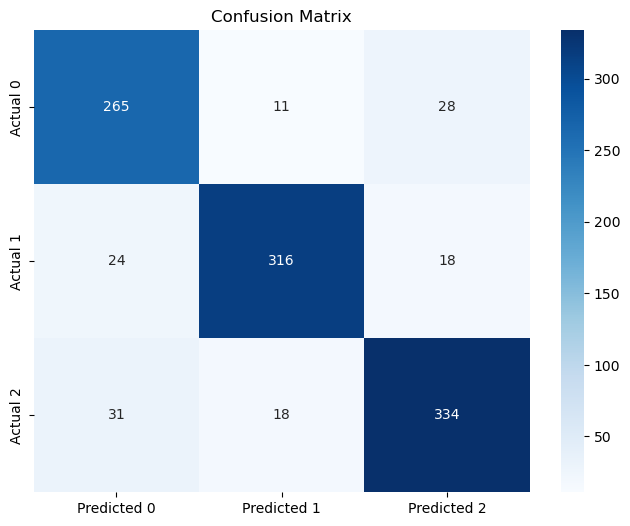

In [11]:
# Create confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Display the confusion matrix
conf_matrix_df = pd.DataFrame(cm, index=[f"Actual {i}" for i in range(len(cm))], columns=[f"Predicted {i}" for i in range(len(cm))])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [12]:
for label in np.unique(train_labels):
    print(f"Number of training examples for class {label}: {sum(np.array(train_labels) == label)}")

for label in np.unique(test_labels):
    print(f"Number of testing examples for class {label}: {sum(np.array(test_labels) == label)}")

Number of training examples for class 1: 708
Number of training examples for class 2: 732
Number of training examples for class 3: 744
Number of testing examples for class 1: 304
Number of testing examples for class 2: 358
Number of testing examples for class 3: 383


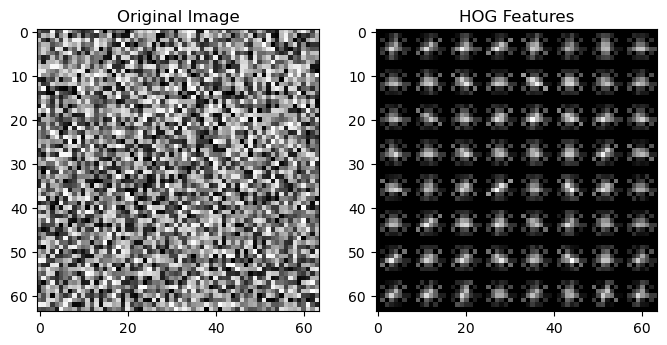

In [16]:
import numpy as np
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

new_image_path = r"E:\objects\training\2\train_image_png_423.png"
train_image_ex = skimage.io.imread(new_image_path)
# Sample image (replace this with your actual image)
train_image_ex = np.random.rand(64, 64)

# Compute HOG features
hog_features, hog_image = hog(train_image_ex, visualize=True, block_norm='L2-Hys')

# Visualize the original image
plt.figure(figsize=(8, 4))
plt.subplot(121).imshow(train_image_ex, cmap=plt.cm.gray)
plt.title('Original Image')

# Visualize the HOG features
plt.subplot(122).imshow(hog_image, cmap=plt.cm.gray)
plt.title('HOG Features')
plt.show()

In [17]:
from skimage.feature import hog

# Assuming train_images_processed is a list of preprocessed images
train_images_processed = preprocess_images_for_hog(train_images)

# Sample image (replace this with an actual image from your dataset)
sample_image = train_images_processed[1]

# Compute HOG features for the sample image
hog_features, hog_image = hog(sample_image, visualize=True)

# Get the learned features
print(f"Number of features: {len(hog_features)}")
print(f"Dimensions of HOG features: {hog_features.shape}")

Number of features: 324
Dimensions of HOG features: (324,)


In [18]:
# from skimage.feature import hog
# import numpy as np

# # Sample image (replace this with an actual image from your dataset)
# sample_image = np.random.rand(64, 64)

# # Compute HOG features for the sample image
# hog_features, hog_image = hog(sample_image, visualize=True)

# # Print the dimensions of the HOG features
# print(f"Dimensions of HOG features: {hog_features.shape}")

In [19]:
# Load and preprocess the new image
new_image_path = r"E:\precidct\unlabeled_image_png_817.png"
new_image = skimage.io.imread(new_image_path)
new_image_processed = preprocess_images_for_hog([new_image])

# Compute HOG features for the new image
new_image_hog_features = []
for img in new_image_processed:
    hog_img = hog(img, visualize=False)
    new_image_hog_features.append(hog_img)

# Make predictions using the trained logistic regression model
new_image_prediction = logreg.predict(new_image_hog_features)

print(f"Predicted label for the new image: {new_image_prediction[0]}")

Predicted label for the new image: 3


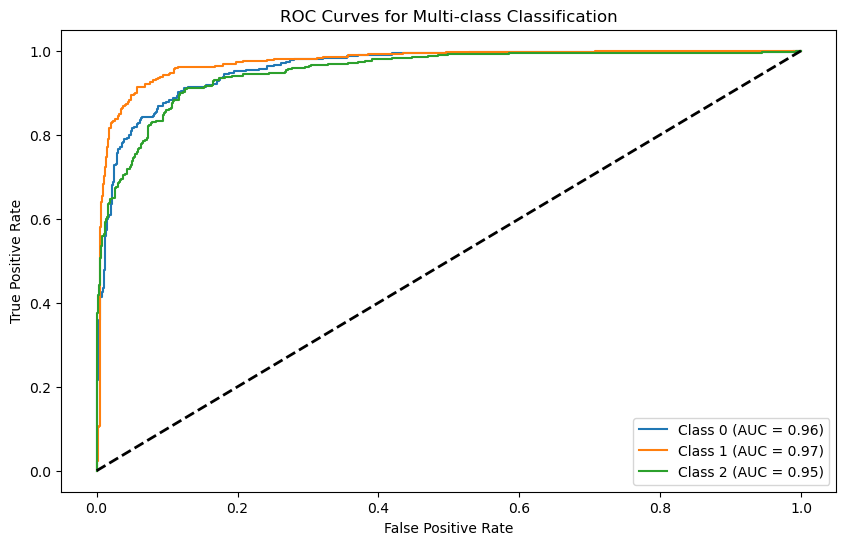

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Reshape the HOG features to be 2D
train_hog_features_2d = np.array(train_hog_features).reshape(len(train_hog_features), -1)
test_hog_features_2d = np.array(test_hog_features).reshape(len(test_hog_features), -1)

# Binarize the labels for each class using label_binarize with multi_class='ovr'
binarized_train_labels = label_binarize(train_labels, classes=np.unique(train_labels))
binarized_test_labels = label_binarize(test_labels, classes=np.unique(train_labels))

num_classes = binarized_train_labels.shape[1]

# Initialize a logistic regression model (you can replace this with your actual model)
logreg = LogisticRegression()

# Create the OneVsRestClassifier from the logistic regression model
model = OneVsRestClassifier(logreg)

# Train the model and get decision function scores
y_score = model.fit(train_hog_features_2d, binarized_train_labels).decision_function(test_hog_features_2d)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(binarized_test_labels[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-class Classification')
plt.legend(loc='lower right')
plt.show()
